# Import modules

In [1]:
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# Load test split data

In [2]:
# Open dataset
with h5py.File(r'C:\Users\edfli\Downloads\brain_tumor_dataset\brain_tumor_dataset_test.h5', 'r') as hdf5_file:
    images_testing = hdf5_file['images'][:]
    labels_testing = hdf5_file['labels'][:]
print(images_testing.shape, labels_testing.shape)

(574, 256, 256, 3) (574,)


# Plot confusion matrix and display classification report

In [3]:
def confusion_matrix_and_report(y_pred, y_test, labels):
  cm = confusion_matrix(y_test, y_pred, )
  #print(type(cm), cm)
  cm = pd.DataFrame(cm,  range(4),range(4))
  x_axis_labels = labels
  y_axis_labels = labels
  plt.figure(figsize = (6,6))
  ax = sns.heatmap(cm, annot=True, fmt='g', annot_kws={"size": 12}, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cbar=False) # font size
  ax.xaxis.tick_top() # x axis on top
  ax.xaxis.set_label_position('top')
  plt.show()

  report = classification_report(y_test, y_pred, target_names = labels)
  print(report)

# Define classes

In [4]:
classes = {0 : 'glioma_tumor',
           1 : 'meningioma_tumor',
           2 : 'normal',
           3 : 'pituitary_tumor'}

# Load models
* Transfer Learning models: VVG16, ResNet50v2, InceptionResNetv2 and MobileNetv2
* Simple CNN

In [5]:
vgg16_custom = tf.keras.models.load_model('Saved_models_and_history/custom_vgg16.keras')
ResNet50v2_custom = tf.keras.models.load_model('Saved_models_and_history/ResNet50v2_custom.keras')
InceptionResNetv2_custom = tf.keras.models.load_model('Saved_models_and_history/InceptionResNetv2_custom.keras')
MobileNetv2_custom = tf.keras.models.load_model('Saved_models_and_history/MobileNetv2_custom.keras')
simple_CNN = tf.keras.models.load_model('Saved_models_and_history/simple_CNN.keras')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3060 Ti, compute capability 8.6


# Evaluate models
* Confussion matrix
* Classification report

## VGG16

In [6]:
class_acc_vgg16_custom = vgg16_custom.evaluate(images_testing, to_categorical(labels_testing), verbose=0)[1]
print("Test Accuracy (vgg16_custom Model): {:.2f}%".format(class_acc_vgg16_custom * 100))

Test Accuracy (vgg16_custom Model): 82.40%


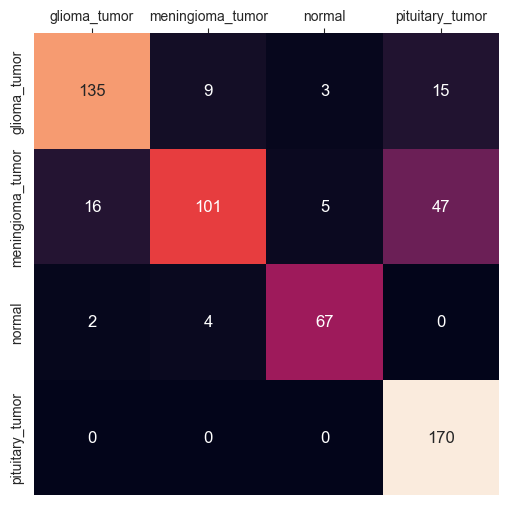

                  precision    recall  f1-score   support

    glioma_tumor       0.88      0.83      0.86       162
meningioma_tumor       0.89      0.60      0.71       169
          normal       0.89      0.92      0.91        73
 pituitary_tumor       0.73      1.00      0.85       170

        accuracy                           0.82       574
       macro avg       0.85      0.84      0.83       574
    weighted avg       0.84      0.82      0.82       574


In [7]:
y_pred_vgg16_custom = vgg16_custom.predict(images_testing)
y_pred_vgg16_custom = np.argmax(y_pred_vgg16_custom, axis = 1)
confusion_matrix_and_report(y_pred_vgg16_custom, labels_testing, list(classes.values()))

## ResNet50V2

In [8]:
class_acc_ResNet50v2_custom = ResNet50v2_custom.evaluate(images_testing, to_categorical(labels_testing), verbose=0)[1]
print("Test Accuracy (ResNet50v2_custom Model): {:.2f}%".format(class_acc_ResNet50v2_custom * 100))

Test Accuracy (ResNet50v2_custom Model): 87.28%


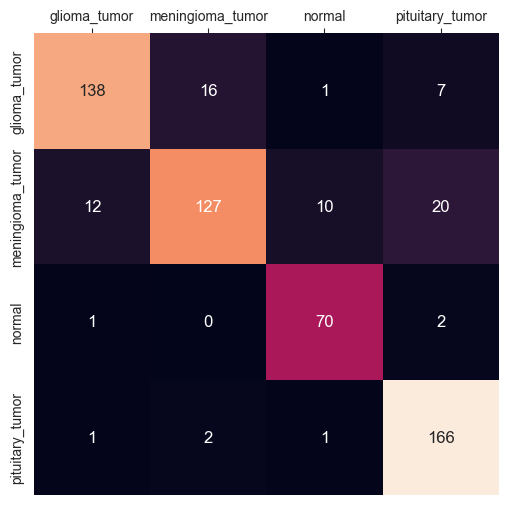

                  precision    recall  f1-score   support

    glioma_tumor       0.91      0.85      0.88       162
meningioma_tumor       0.88      0.75      0.81       169
          normal       0.85      0.96      0.90        73
 pituitary_tumor       0.85      0.98      0.91       170

        accuracy                           0.87       574
       macro avg       0.87      0.88      0.88       574
    weighted avg       0.87      0.87      0.87       574


In [9]:
y_pred_ResNet50v2_custom = ResNet50v2_custom.predict(images_testing)
y_pred_ResNet50v2_custom = np.argmax(y_pred_ResNet50v2_custom, axis = 1)
confusion_matrix_and_report(y_pred_ResNet50v2_custom, labels_testing, list(classes.values()))

## InceptionResNetv2

In [10]:
class_acc_InceptionResNetv2_custom = InceptionResNetv2_custom.evaluate(images_testing, to_categorical(labels_testing), verbose=0)[1]
print("Test Accuracy (InceptionResNetv2_custom Model): {:.2f}%".format(class_acc_InceptionResNetv2_custom * 100))

Test Accuracy (InceptionResNetv2_custom Model): 87.63%


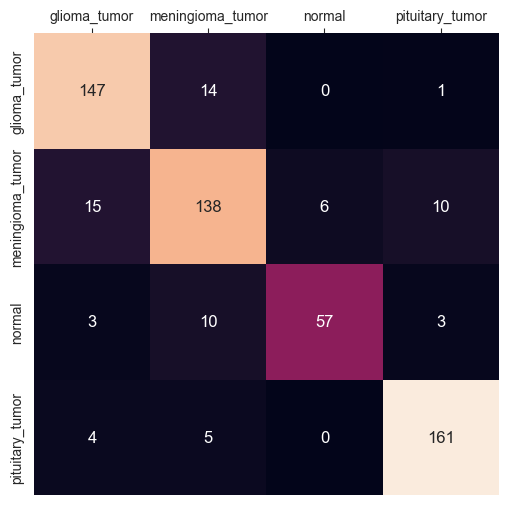

                  precision    recall  f1-score   support

    glioma_tumor       0.87      0.91      0.89       162
meningioma_tumor       0.83      0.82      0.82       169
          normal       0.90      0.78      0.84        73
 pituitary_tumor       0.92      0.95      0.93       170

        accuracy                           0.88       574
       macro avg       0.88      0.86      0.87       574
    weighted avg       0.88      0.88      0.88       574


In [11]:
y_pred_InceptionResNetv2_custom = InceptionResNetv2_custom.predict(images_testing)
y_pred_InceptionResNetv2_custom = np.argmax(y_pred_InceptionResNetv2_custom, axis = 1)
confusion_matrix_and_report(y_pred_InceptionResNetv2_custom, labels_testing, list(classes.values()))

## MobileNetv2

In [12]:
class_acc_MobileNetv2_custom = MobileNetv2_custom.evaluate(images_testing, to_categorical(labels_testing), verbose=0)[1]
print("Test Accuracy (MobileNetv2_custom Model): {:.2f}%".format(class_acc_MobileNetv2_custom * 100))

Test Accuracy (MobileNetv2_custom Model): 85.54%


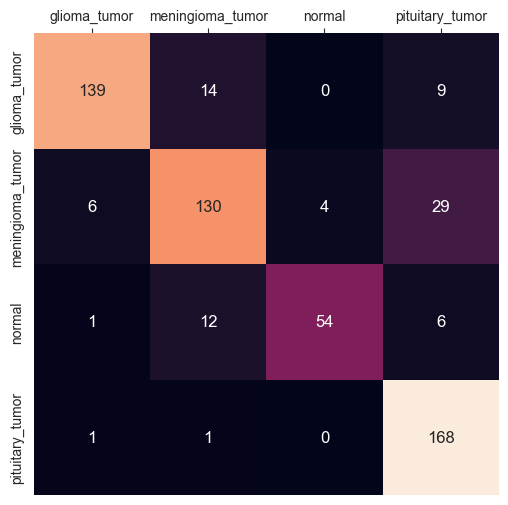

                  precision    recall  f1-score   support

    glioma_tumor       0.95      0.86      0.90       162
meningioma_tumor       0.83      0.77      0.80       169
          normal       0.93      0.74      0.82        73
 pituitary_tumor       0.79      0.99      0.88       170

        accuracy                           0.86       574
       macro avg       0.87      0.84      0.85       574
    weighted avg       0.86      0.86      0.85       574


In [13]:
y_pred_MobileNetv2_custom = MobileNetv2_custom.predict(images_testing)
y_pred_MobileNetv2_custom = np.argmax(y_pred_MobileNetv2_custom, axis = 1)
confusion_matrix_and_report(y_pred_MobileNetv2_custom, labels_testing, list(classes.values()))

## Simple CNN

In [14]:
class_acc_simple_CNN = simple_CNN.evaluate(images_testing, to_categorical(labels_testing), verbose=0)[1]
print("Test Accuracy (simple_CNN Model): {:.2f}%".format(class_acc_simple_CNN * 100))

Test Accuracy (simple_CNN Model): 86.76%


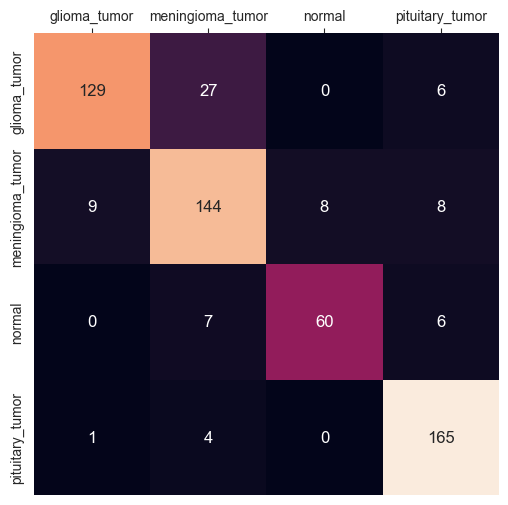

                  precision    recall  f1-score   support

    glioma_tumor       0.93      0.80      0.86       162
meningioma_tumor       0.79      0.85      0.82       169
          normal       0.88      0.82      0.85        73
 pituitary_tumor       0.89      0.97      0.93       170

        accuracy                           0.87       574
       macro avg       0.87      0.86      0.86       574
    weighted avg       0.87      0.87      0.87       574


In [15]:
y_pred_simple_CNN = simple_CNN.predict(images_testing)
y_pred_simple_CNN = np.argmax(y_pred_simple_CNN, axis = 1)
confusion_matrix_and_report(y_pred_simple_CNN, labels_testing, list(classes.values()))